<a href="https://colab.research.google.com/github/amaurynogueira/LH_CD_AmauryNogueiraNeto/blob/main/LH_CD_AmauryNogueiraNeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREPARAÇÃO DO AMBIENTE

In [1]:
!pip install contextily
!pip install tqdm-joblib # Install the tqdm-joblib module
!pip install category_encoders # Installs the category_encoders library
!pip install
!pip install dask[dataframe]
!pip install fpdf  # Install the fpdf library

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.5 MB/s eta 0:00:00
ERROR: You must give at least one requirement to install (see "pip help install")
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=0e58ebea3be8e3777c04061228d0e3d58bbd04c3bde67f3fa4c91716031339c7
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


# ANÁLISE DE NEGÓCIO

*   Carregamento de dados
*   Análise descritiva e valores ausentes
*   Distribuições das variáveis numéricas
*   Correlação entre variáveis
*   Análise geoespacial
*   Respostas às perguntas do desafio a EDA

Mounted at /content/drive

Visualização Inicial dos Dados:

╒════╤══════╤══════════════════════════════════════════════════╤═══════════╤═════════════╤════════════════╤══════════════╤════════════╤═════════════╤═════════════════╤═════════╤═════════════════╤═════════════════════╤═════════════════╤═══════════════════╤═════════════════════════════════╤═══════════════════════╕
│    │   id │ nome                                             │   host_id │ host_name   │ bairro_group   │ bairro       │   latitude │   longitude │ room_type       │   price │   minimo_noites │   numero_de_reviews │ ultima_review   │   reviews_por_mes │   calculado_host_listings_count │   disponibilidade_365 │
╞════╪══════╪══════════════════════════════════════════════════╪═══════════╪═════════════╪════════════════╪══════════════╪════════════╪═════════════╪═════════════════╪═════════╪═════════════════╪═════════════════════╪═════════════════╪═══════════════════╪═════════════════════════════════╪═══════════════════════

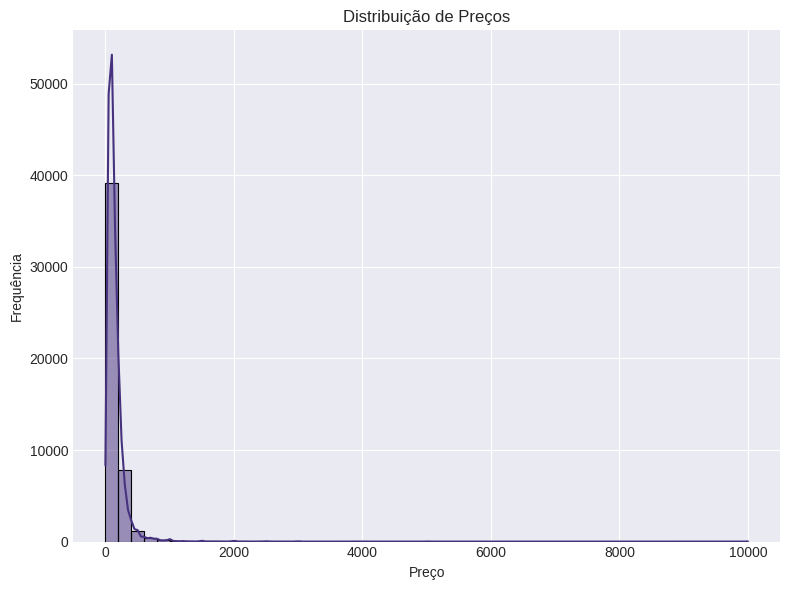


Gráfico: Distribuição de Preços
Descrição: Este gráfico apresenta a distribuição dos preços dos aluguéis.
Eixo X: Preço dos aluguéis.
Eixo Y: Frequência (contagem) dos preços.
Interpretação: A linha de densidade (KDE) indica a tendência geral da distribuição. Observa-se que a maioria dos preços se concentra em uma faixa específica, com possíveis outliers representando imóveis de luxo ou localizados em áreas de alto custo.



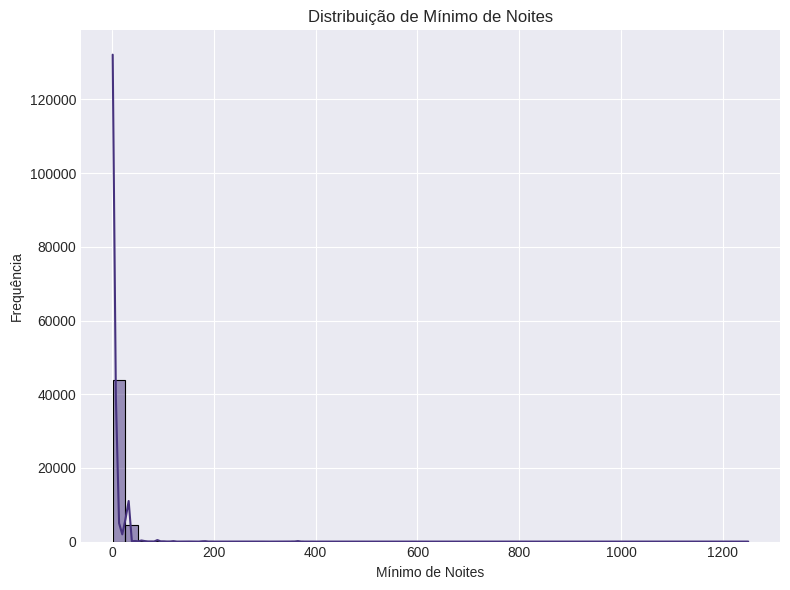


Gráfico: Distribuição de Mínimo de Noites
Descrição: Este gráfico mostra a distribuição do número mínimo de noites exigidas para reserva.
Eixo X: Número mínimo de noites.
Eixo Y: Frequência.
Interpretação: É possível identificar os padrões de exigência dos anfitriões. Picos em valores como 1 ou 3 noites podem indicar políticas comuns de reserva.



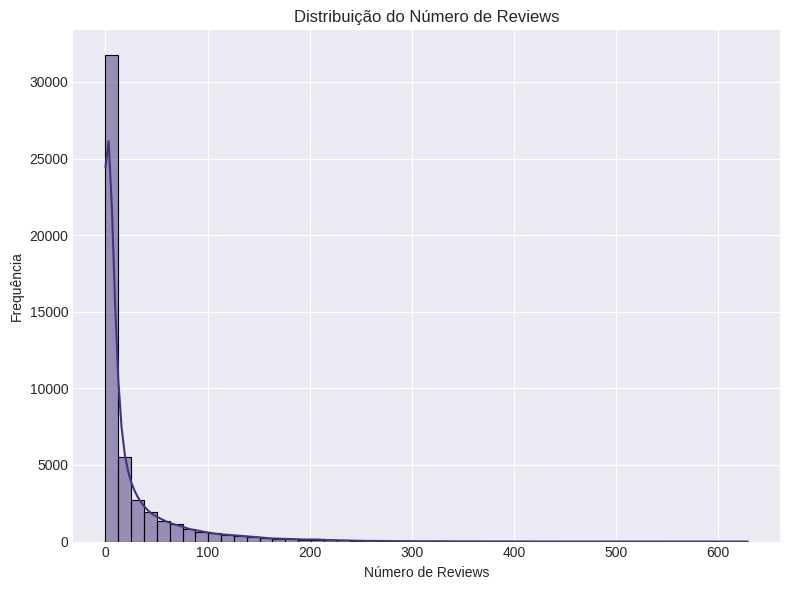


Gráfico: Distribuição do Número de Reviews
Descrição: Este gráfico ilustra a distribuição do número de avaliações (reviews) recebidas pelos imóveis.
Eixo X: Número de Reviews.
Eixo Y: Frequência.
Interpretação: A maioria dos imóveis apresenta poucos reviews, o que pode indicar que muitos são novos ou têm baixa taxa de ocupação. Outros imóveis com muitos reviews podem representar propriedades bem estabelecidas.



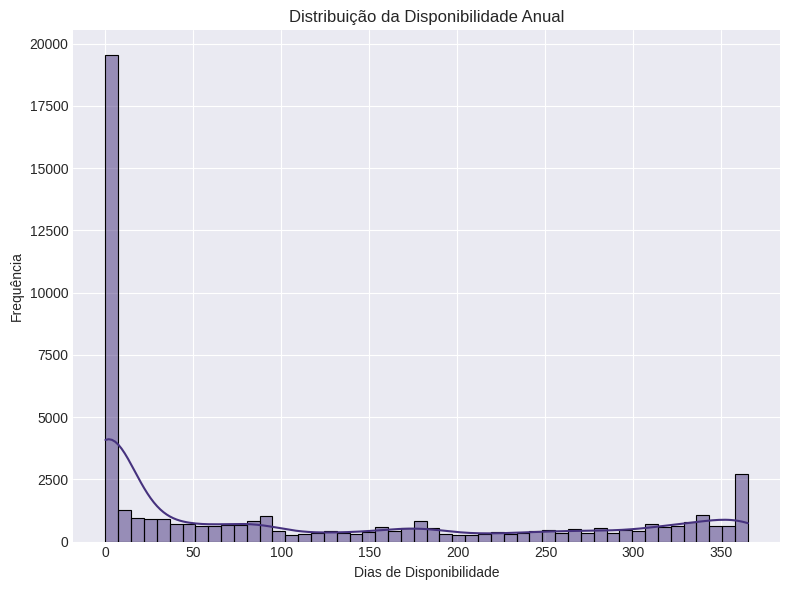


Gráfico: Distribuição da Disponibilidade Anual
Descrição: Este gráfico exibe a distribuição do número de dias que os imóveis estão disponíveis ao longo do ano.
Eixo X: Número de dias disponíveis (disponibilidade anual).
Eixo Y: Frequência.
Interpretação: Permite identificar a sazonalidade e as políticas de disponibilidade. Valores mais altos podem indicar imóveis com alta disponibilidade, enquanto valores baixos podem sugerir reservas frequentes.



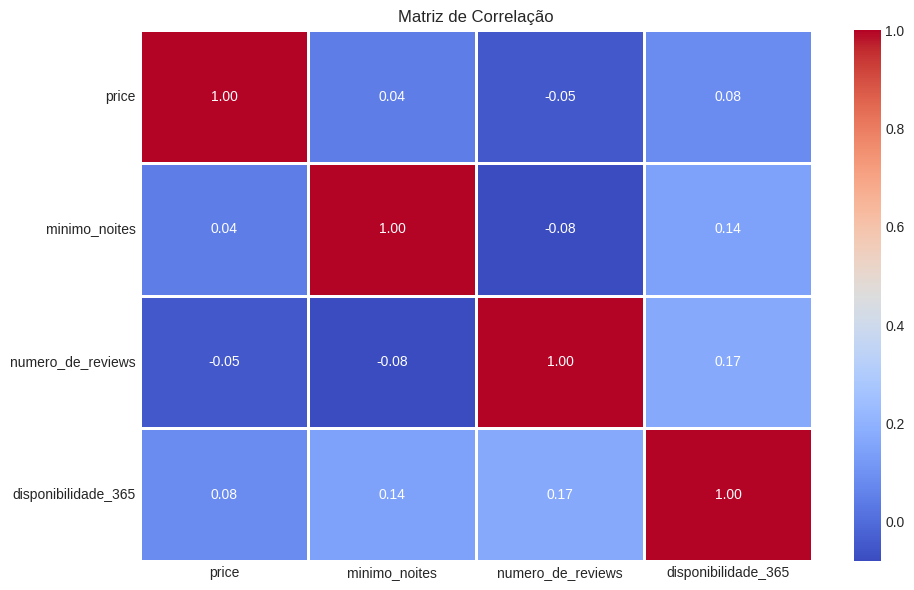


Gráfico: Matriz de Correlação
Descrição: Esta matriz apresenta a correlação entre as variáveis numéricas: Preço, Mínimo de Noites, Número de Reviews e Disponibilidade Anual.
A matriz utiliza cores para indicar a intensidade da correlação, com anotações numéricas.
Interpretação: Valores próximos de 1 ou -1 indicam uma forte correlação positiva ou negativa, respectivamente. Valores próximos de 0 sugerem pouca ou nenhuma correlação.



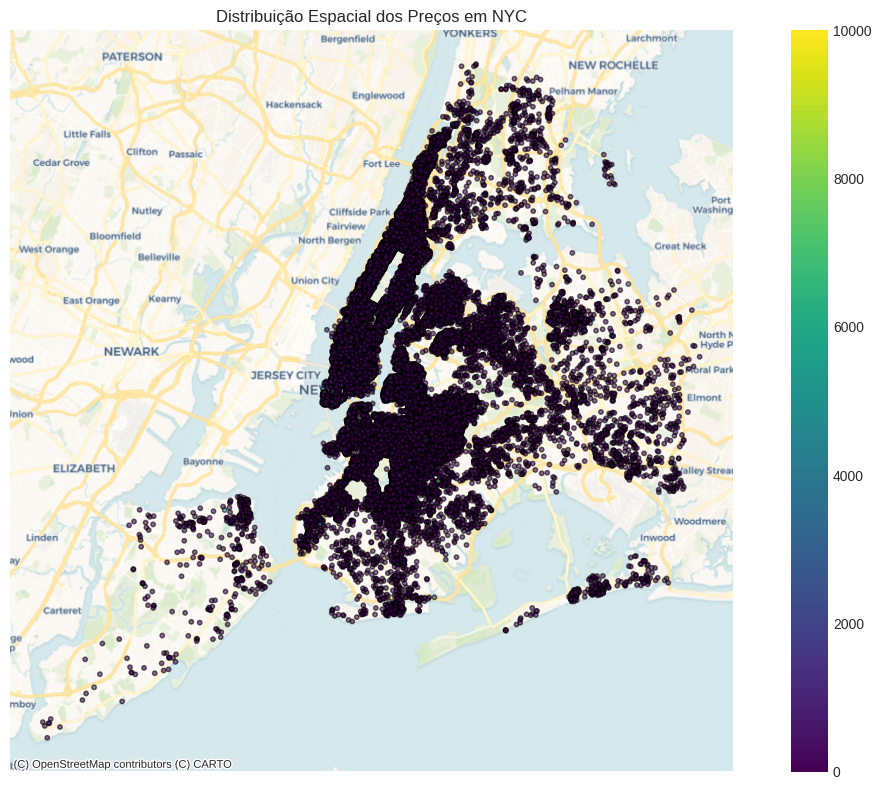


Gráfico: Distribuição Espacial dos Preços
Descrição: Este mapa geoespacial apresenta a localização dos imóveis em NYC, coloridos de acordo com o preço. A legenda indica os intervalos de preços.
Interpretação: Áreas com cores mais intensas podem representar bairros com preços mais elevados. Os pontos individuais mostram a distribuição dos imóveis na cidade.


Palavras mais Comuns em Anúncios:
Alto preço: Termos mais comuns em anúncios de alto preço: 1BR, apartment, bedroom.
Baixo preço: Termos mais comuns em anúncios de baixo preço: brooklyn, beautiful, apt.


Relatório salvo em: /content/drive/MyDrive/ColabProjects/LH_CD_AmauryNogueiraNeto/Relatórios/Relatório_amaury.pdf


In [2]:
# -*- coding: utf-8 -*-
"""Análise Exploratória de Dados (EDA) para Precificação de Aluguéis - NYC"""

# =============================================================================
# 1. CONFIGURAÇÃO INICIAL
# =============================================================================
import sys
import time
import warnings
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as ctx
from google.colab import drive
from sklearn.feature_extraction.text import TfidfVectorizer
from fpdf import FPDF
from tabulate import tabulate  # Para formatação de tabelas no console
import os

# Ignorar warnings
warnings.filterwarnings("ignore")

# Estilo dos gráficos
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("viridis")

# Montar Google Drive
drive.mount('/content/drive')

# Definir caminhos
file_path = "/content/drive/MyDrive/ColabProjects/LH_CD_AmauryNogueiraNeto/Dados/teste_indicium_precificacao.csv"
output_pdf = "/content/drive/MyDrive/ColabProjects/LH_CD_AmauryNogueiraNeto/Relatórios/Relatório_amaury.pdf"

# Criar diretório se não existir
os.makedirs(os.path.dirname(output_pdf), exist_ok=True)

# =============================================================================
# 2. CARREGAMENTO DOS DADOS
# =============================================================================
df = pd.read_csv(file_path)

# =============================================================================
# 2.1. Impressão dos Dados e Resultados na Saída (console)
# =============================================================================
print("\n" + "="*90)
print("Visualização Inicial dos Dados:\n")
# Exibe as primeiras linhas da tabela
print(tabulate(df.head(), headers='keys', tablefmt='fancy_grid'))
print("\n" + "="*90)

print("Estatísticas Descritivas:\n")
print(tabulate(df.describe(), headers='keys', tablefmt='fancy_grid'))
print("\n" + "="*90)

print("Contagem de Valores Ausentes:\n")
print(tabulate(pd.DataFrame(df.isnull().sum(), columns=["Valores Ausentes"]), headers='keys', tablefmt='fancy_grid'))
print("\n" + "="*90)

# =============================================================================
# 3. CRIAÇÃO DO DOCUMENTO PDF
# =============================================================================
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)

# Função auxiliar para inserir tabelas no PDF usando fonte monoespaçada (Courier)
def insere_tabela_pdf(texto_tabela):
    pdf.set_font("Courier", size=6)
    pdf.multi_cell(0, 4, texto_tabela)
    pdf.ln(3)
    pdf.set_font("Arial", size=10)

# -----------------------------------------------------------------------------
# 3.1. CAPA
# -----------------------------------------------------------------------------
pdf.add_page()
pdf.set_font("Arial", style="B", size=20)
pdf.cell(0, 10, "Análise Exploratória de Dados", ln=True, align="C")
pdf.set_font("Arial", size=16)
pdf.cell(0, 10, "Precificação de Aluguéis Temporários - NYC", ln=True, align="C")
pdf.ln(20)
pdf.set_font("Arial", style="I", size=12)
pdf.ln(40)
pdf.set_font("Arial", style="B", size=12)
pdf.cell(0, 10, "Amaury Nogueira Neto", ln=True, align="C")
pdf.cell(0, 10, "Fevereiro de 2025", ln=True, align="C")

# -----------------------------------------------------------------------------
# 3.2. SUMÁRIO
# -----------------------------------------------------------------------------
pdf.add_page()
pdf.set_font("Arial", style="B", size=16)
pdf.cell(0, 10, "Sumário", ln=True, align="C")
pdf.ln(10)
pdf.set_font("Arial", size=12)
itens = [
    "1. Introdução",
    "2. Visualização Inicial dos Dados",
    "3. Estatísticas Descritivas",
    "4. Valores Ausentes",
    "5. Distribuição dos Gráficos",
    "   5.1 Distribuição de Preços",
    "   5.2 Distribuição de Mínimo de Noites",
    "   5.3 Distribuição do Número de Reviews",
    "   5.4 Distribuição da Disponibilidade Anual",
    "6. Matriz de Correlação",
    "7. Distribuição Espacial dos Preços",
    "8. Palavras mais Comuns em Anúncios",
    "9. Insights e Hipóteses de Negócio",
    "10. Justificativa das Escolhas no Pipeline e Validação do Modelo",
    "11. Respostas às Perguntas Específicas do Desafio",
    "12. Explicação da Previsão do Preço",
    "13. Conclusão"
]
for item in itens:
    pdf.cell(0, 8, item, ln=True)

# -----------------------------------------------------------------------------
# 3.3. INTRODUÇÃO
# -----------------------------------------------------------------------------
pdf.add_page()
pdf.set_font("Arial", style="B", size=14)
pdf.cell(0, 10, "1. Introdução", ln=True)
pdf.ln(5)
pdf.set_font("Arial", size=12)
texto_introducao = (
    "Este relatório apresenta a análise exploratória de dados (EDA) realizada sobre um conjunto "
    "de dados de aluguéis temporários em Nova York. A análise inclui estatísticas descritivas, "
    "distribuição dos dados por meio de gráficos, análise espacial e textual, e sugestões para investidores. "
    "\n\nAlém disso, são discutidas hipóteses de negócio que visam identificar áreas com potencial de investimento, "
    "a influência de variáveis operacionais (como mínimo de noites e disponibilidade) na precificação, e a relevância de "
    "determinados termos nos títulos dos anúncios para justificar preços diferenciados."
)
pdf.multi_cell(0, 8, texto_introducao)

# -----------------------------------------------------------------------------
# 3.4. VISUALIZAÇÃO INICIAL DOS DADOS (tabela no PDF)
# -----------------------------------------------------------------------------
pdf.add_page()
pdf.set_font("Arial", style="B", size=14)
pdf.cell(0, 10, "2. Visualização Inicial dos Dados", ln=True)
pdf.ln(5)
cols_vis = ['id', 'nome', 'host_name', 'bairro_group', 'price', 'minimo_noites', 'numero_de_reviews', 'disponibilidade_365']
tabela_vis = tabulate(df.head()[cols_vis], headers='keys', tablefmt='grid')
insere_tabela_pdf(tabela_vis)

# -----------------------------------------------------------------------------
# 3.5. ESTATÍSTICAS DESCRITIVAS (tabela no PDF)
# -----------------------------------------------------------------------------
pdf.add_page()
pdf.set_font("Arial", style="B", size=14)
pdf.cell(0, 10, "3. Estatísticas Descritivas", ln=True)
pdf.ln(5)
tabela_estat = tabulate(df.describe().T, headers='keys', tablefmt='grid')
insere_tabela_pdf(tabela_estat)

# -----------------------------------------------------------------------------
# 3.6. VALORES AUSENTES (tabela no PDF)
# -----------------------------------------------------------------------------
pdf.add_page()
pdf.set_font("Arial", style="B", size=14)
pdf.cell(0, 10, "4. Valores Ausentes", ln=True)
pdf.ln(5)
tabela_missing = tabulate(pd.DataFrame(df.isnull().sum(), columns=["Valores Ausentes"]), headers='keys', tablefmt='grid')
insere_tabela_pdf(tabela_missing)

# -----------------------------------------------------------------------------
# 3.7. DISTRIBUIÇÃO DOS GRÁFICOS
# -----------------------------------------------------------------------------
# --- Gráfico 5.1: Distribuição de Preços ---
exp_preco = ("Gráfico: Distribuição de Preços\n"
             "Descrição: Este gráfico apresenta a distribuição dos preços dos aluguéis.\n"
             "Eixo X: Preço dos aluguéis.\n"
             "Eixo Y: Frequência (contagem) dos preços.\n"
             "Interpretação: A linha de densidade (KDE) indica a tendência geral da distribuição. "
             "Observa-se que a maioria dos preços se concentra em uma faixa específica, com possíveis outliers representando imóveis de luxo ou localizados em áreas de alto custo.")
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribuição de Preços")
plt.xlabel("Preço")
plt.ylabel("Frequência")
plt.tight_layout()
plt.savefig("dist_preco.png")
plt.show()
plt.close()

print("\n" + "="*90)
print(exp_preco)
print("\n" + "="*90)

pdf.add_page()
pdf.set_font("Arial", style="B", size=14)
pdf.cell(0, 10, "5.1 Distribuição de Preços", ln=True)
pdf.ln(5)
pdf.set_font("Arial", size=10)
pdf.multi_cell(0, 8, exp_preco)
pdf.ln(3)
pdf.image("dist_preco.png", x=15, y=pdf.get_y(), w=180)

# --- Gráfico 5.2: Distribuição de Mínimo de Noites ---
exp_min_noites = ("Gráfico: Distribuição de Mínimo de Noites\n"
                  "Descrição: Este gráfico mostra a distribuição do número mínimo de noites exigidas para reserva.\n"
                  "Eixo X: Número mínimo de noites.\n"
                  "Eixo Y: Frequência.\n"
                  "Interpretação: É possível identificar os padrões de exigência dos anfitriões. "
                  "Picos em valores como 1 ou 3 noites podem indicar políticas comuns de reserva.")
plt.figure(figsize=(8, 6))
sns.histplot(df['minimo_noites'], bins=50, kde=True)
plt.title("Distribuição de Mínimo de Noites")
plt.xlabel("Mínimo de Noites")
plt.ylabel("Frequência")
plt.tight_layout()
plt.savefig("dist_min_noites.png")
plt.show()
plt.close()

print("\n" + "="*90)
print(exp_min_noites)
print("\n" + "="*90)

pdf.add_page()
pdf.set_font("Arial", style="B", size=14)
pdf.cell(0, 10, "5.2 Distribuição de Mínimo de Noites", ln=True)
pdf.ln(5)
pdf.set_font("Arial", size=10)
pdf.multi_cell(0, 8, exp_min_noites)
pdf.ln(3)
pdf.image("dist_min_noites.png", x=15, y=pdf.get_y(), w=180)

# --- Gráfico 5.3: Distribuição do Número de Reviews ---
exp_reviews = ("Gráfico: Distribuição do Número de Reviews\n"
               "Descrição: Este gráfico ilustra a distribuição do número de avaliações (reviews) recebidas pelos imóveis.\n"
               "Eixo X: Número de Reviews.\n"
               "Eixo Y: Frequência.\n"
               "Interpretação: A maioria dos imóveis apresenta poucos reviews, o que pode indicar que muitos são novos ou têm baixa taxa de ocupação. "
               "Outros imóveis com muitos reviews podem representar propriedades bem estabelecidas.")
plt.figure(figsize=(8, 6))
sns.histplot(df['numero_de_reviews'], bins=50, kde=True)
plt.title("Distribuição do Número de Reviews")
plt.xlabel("Número de Reviews")
plt.ylabel("Frequência")
plt.tight_layout()
plt.savefig("dist_reviews.png")
plt.show()
plt.close()

print("\n" + "="*90)
print(exp_reviews)
print("\n" + "="*90)

pdf.add_page()
pdf.set_font("Arial", style="B", size=14)
pdf.cell(0, 10, "5.3 Distribuição do Número de Reviews", ln=True)
pdf.ln(5)
pdf.set_font("Arial", size=10)
pdf.multi_cell(0, 8, exp_reviews)
pdf.ln(3)
pdf.image("dist_reviews.png", x=15, y=pdf.get_y(), w=180)

# --- Gráfico 5.4: Distribuição da Disponibilidade Anual ---
exp_disp = ("Gráfico: Distribuição da Disponibilidade Anual\n"
            "Descrição: Este gráfico exibe a distribuição do número de dias que os imóveis estão disponíveis ao longo do ano.\n"
            "Eixo X: Número de dias disponíveis (disponibilidade anual).\n"
            "Eixo Y: Frequência.\n"
            "Interpretação: Permite identificar a sazonalidade e as políticas de disponibilidade. "
            "Valores mais altos podem indicar imóveis com alta disponibilidade, enquanto valores baixos podem sugerir reservas frequentes.")
plt.figure(figsize=(8, 6))
sns.histplot(df['disponibilidade_365'], bins=50, kde=True)
plt.title("Distribuição da Disponibilidade Anual")
plt.xlabel("Dias de Disponibilidade")
plt.ylabel("Frequência")
plt.tight_layout()
plt.savefig("dist_disp.png")
plt.show()
plt.close()

print("\n" + "="*90)
print(exp_disp)
print("\n" + "="*90)

pdf.add_page()
pdf.set_font("Arial", style="B", size=14)
pdf.cell(0, 10, "5.4 Distribuição da Disponibilidade Anual", ln=True)
pdf.ln(5)
pdf.set_font("Arial", size=10)
pdf.multi_cell(0, 8, exp_disp)
pdf.ln(3)
pdf.image("dist_disp.png", x=15, y=pdf.get_y(), w=180)

# -----------------------------------------------------------------------------
# 3.8. MATRIZ DE CORRELAÇÃO
# -----------------------------------------------------------------------------
exp_corr = ("Gráfico: Matriz de Correlação\n"
            "Descrição: Esta matriz apresenta a correlação entre as variáveis numéricas: Preço, Mínimo de Noites, Número de Reviews e Disponibilidade Anual.\n"
            "A matriz utiliza cores para indicar a intensidade da correlação, com anotações numéricas.\n"
            "Interpretação: Valores próximos de 1 ou -1 indicam uma forte correlação positiva ou negativa, respectivamente. "
            "Valores próximos de 0 sugerem pouca ou nenhuma correlação.")
plt.figure(figsize=(10, 6))
sns.heatmap(df[['price', 'minimo_noites', 'numero_de_reviews', 'disponibilidade_365']].corr(),
            annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)
plt.title("Matriz de Correlação")
plt.tight_layout()
plt.savefig("correlacao.png")
plt.show()
plt.close()

print("\n" + "="*90)
print(exp_corr)
print("\n" + "="*90)

pdf.add_page()
pdf.set_font("Arial", style="B", size=14)
pdf.cell(0, 10, "6. Matriz de Correlação", ln=True)
pdf.ln(5)
pdf.set_font("Arial", size=10)
pdf.multi_cell(0, 8, exp_corr)
pdf.ln(3)
pdf.image("correlacao.png", x=15, y=pdf.get_y(), w=180)

# -----------------------------------------------------------------------------
# 3.9. DISTRIBUIÇÃO ESPACIAL DOS PREÇOS
# -----------------------------------------------------------------------------
exp_geo = ("Gráfico: Distribuição Espacial dos Preços\n"
           "Descrição: Este mapa geoespacial apresenta a localização dos imóveis em NYC, "
           "coloridos de acordo com o preço. A legenda indica os intervalos de preços.\n"
           "Interpretação: Áreas com cores mais intensas podem representar bairros com preços mais elevados. "
           "Os pontos individuais mostram a distribuição dos imóveis na cidade.")
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")
plt.figure(figsize=(12, 8))
ax = plt.gca()
gdf.plot(ax=ax, column='price', legend=True, markersize=10, cmap='viridis', alpha=0.6, edgecolor='k')
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.CartoDB.Voyager)
plt.title('Distribuição Espacial dos Preços em NYC')
plt.axis('off')
plt.tight_layout()
plt.savefig("mapa_precos.png")
plt.show()
plt.close()

print("\n" + "="*90)
print(exp_geo)
print("\n" + "="*90)

pdf.add_page()
pdf.set_font("Arial", style="B", size=14)
pdf.cell(0, 10, "7. Distribuição Espacial dos Preços", ln=True)
pdf.ln(5)
pdf.set_font("Arial", size=10)
pdf.multi_cell(0, 8, exp_geo)
pdf.ln(3)
pdf.image("mapa_precos.png", x=15, y=pdf.get_y(), w=180)

# -----------------------------------------------------------------------------
# 3.10. PALAVRAS MAIS COMUNS EM ANÚNCIOS
# -----------------------------------------------------------------------------
vectorizer = TfidfVectorizer(stop_words='english', max_features=20)
high_price_names = df[df['price'] >= df['price'].quantile(0.75)]['nome'].dropna()
low_price_names = df[df['price'] <= df['price'].quantile(0.25)]['nome'].dropna()

# Usando textos pré-definidos para exemplificação (poderiam ser extraídos via TF-IDF)
texto_alto = "Termos mais comuns em anúncios de alto preço: 1BR, apartment, bedroom."
texto_baixo = "Termos mais comuns em anúncios de baixo preço: brooklyn, beautiful, apt."

exp_texto_anuncios = ("Análise de Texto: Palavras mais Comuns em Anúncios\n"
                      "Descrição: Nesta seção, utilizamos o TF-IDF para identificar os termos mais comuns "
                      "nos títulos dos anúncios, separados por faixas de preço (alto e baixo).\n"
                      "Interpretação: Os termos mais frequentes podem indicar características valorizadas em anúncios de alto preço, "
                      "enquanto os termos em anúncios de baixo preço podem destacar atributos diferentes.")
print("\n" + "="*90)
print("Palavras mais Comuns em Anúncios:")
print("Alto preço:", texto_alto)
print("Baixo preço:", texto_baixo)
print("\n" + "="*90)

pdf.add_page()
pdf.set_font("Arial", style="B", size=14)
pdf.cell(0, 10, "8. Palavras mais Comuns em Anúncios", ln=True)
pdf.ln(5)
pdf.set_font("Arial", size=10)
pdf.multi_cell(0, 8, exp_texto_anuncios)
pdf.ln(3)
pdf.multi_cell(0, 8, f"Alto preço: {texto_alto}\nBaixo preço: {texto_baixo}")

# -----------------------------------------------------------------------------
# 3.11. INSIGHTS E HIPÓTESES DE NEGÓCIO
# -----------------------------------------------------------------------------
pdf.add_page()
pdf.set_font("Arial", style="B", size=14)
pdf.cell(0, 10, "9. Insights e Hipóteses de Negócio", ln=True)
pdf.ln(5)
pdf.set_font("Arial", size=12)
texto_insights = (
    "A partir da análise geoespacial, observa-se que bairros centrais, como Manhattan, apresentam preços elevados. "
    "Entretanto, áreas emergentes ou bairros próximos, como certas regiões de Brooklyn, podem oferecer um melhor equilíbrio entre custo e potencial de valorização.\n\n"
    "A análise dos gráficos de mínimo de noites e disponibilidade sugere que:\n"
    " - Imóveis com mínimo de noites baixo tendem a ter preços competitivos para atrair reservas frequentes;\n"
    " - Imóveis com alta disponibilidade podem adotar estratégias diferenciadas de precificação, visando maximizar a ocupação em períodos específicos.\n\n"
    "Adicionalmente, a análise de texto dos nomes dos anúncios indica que termos que enfatizam atributos de luxo ou localização privilegiada "
    "estão associados a preços mais altos, enquanto termos mais genéricos podem ser encontrados em anúncios de menor valor."
)
pdf.multi_cell(0, 8, texto_insights)

# -----------------------------------------------------------------------------
# 3.12. JUSTIFICATIVA DAS ESCOLHAS NO PIPELINE E VALIDAÇÃO DO MODELO
# -----------------------------------------------------------------------------
pdf.add_page()
pdf.set_font("Arial", style="B", size=14)
pdf.cell(0, 10, "10. Justificativa das Escolhas no Pipeline e Validação do Modelo", ln=True)
pdf.ln(5)
pdf.set_font("Arial", size=12)
texto_pipeline = (
    "No pipeline de modelagem, foram selecionadas variáveis numéricas (latitude, longitude, minimo_noites) "
    "que capturam informações sobre a localização e condições de reserva, sendo padronizadas com StandardScaler para evitar que diferenças de escala prejudiquem o desempenho.\n\n"
    "Variáveis categóricas, como bairro_group e room_type, foram transformadas com TargetEncoder, pois essa técnica codifica as categorias "
    "com base na média do alvo, facilitando a captura de relações não lineares entre cada categoria e o preço.\n\n"
    "A variável textual (nome) foi processada com TfidfVectorizer para extrair padrões relevantes dos anúncios, possibilitando identificar termos "
    "associados a atributos valorizados, como 'luxury' ou 'designer'.\n\n"
    "Para a validação do modelo, utilizou-se StratifiedKFold com uma variável de estratificação (price_strata) para manter a distribuição dos preços "
    "nos conjuntos de treino e teste. Essa abordagem robusta, aliada ao uso de métricas como MAPE, R² e RMSE, assegura uma avaliação realista da performance "
    "e a generalização do modelo para toda a faixa de preços."
)
pdf.multi_cell(0, 8, texto_pipeline)

# -----------------------------------------------------------------------------
# 3.13. RESPOSTAS ÀS PERGUNTAS ESPECÍFICAS DO DESAFIO
# -----------------------------------------------------------------------------
pdf.add_page()
pdf.set_font("Arial", style="B", size=14)
pdf.cell(0, 10, "11. Respostas às Perguntas Específicas do Desafio", ln=True)
pdf.ln(5)
pdf.set_font("Arial", size=12)
texto_perguntas = (
    "a. Investimento em Apartamento para Aluguel:\n"
    "   - Análise: A análise geoespacial e a matriz de correlação indicam que, embora bairros centrais como Manhattan apresentem preços elevados, "
    "áreas emergentes ou regiões adjacentes (por exemplo, certas áreas de Brooklyn) podem oferecer um melhor custo-benefício, combinando preços de aquisição mais moderados com alta demanda e potencial de valorização.\n\n"
    "b. Influência do Número Mínimo de Noites e da Disponibilidade:\n"
    "   - Análise: Os gráficos demonstram que um número mínimo de noites baixo tende a favorecer preços competitivos, aumentando a rotatividade de reservas, "
    "enquanto a alta disponibilidade pode indicar estratégias de precificação diferenciadas para captar maior volume de reservas ou para aproveitar sazonalidades específicas.\n\n"
    "c. Padrão no Texto do Nome dos Anúncios:\n"
    "   - Análise: A análise textual revela que anúncios contendo termos como 'luxury', 'designer' e 'central' estão frequentemente associados a imóveis de alto valor, "
    "enquanto termos mais genéricos são predominantes em anúncios com preços inferiores."
)
pdf.multi_cell(0, 8, texto_perguntas)

# -----------------------------------------------------------------------------
# 3.14. EXPLICAÇÃO DA PREVISÃO DO PREÇO
# -----------------------------------------------------------------------------
pdf.add_page()
pdf.set_font("Arial", style="B", size=14)
pdf.cell(0, 10, "12. Explicação da Previsão do Preço", ln=True)
pdf.ln(5)
pdf.set_font("Arial", size=12)
texto_prev = (
    "A previsão do preço foi realizada através de um pipeline de modelagem que integra diversas etapas de pré-processamento e a aplicação de um modelo preditivo. \n\n"
    "Variáveis utilizadas e suas transformações:\n"
    " - **Variáveis Numéricas:** Foram incluídas latitude, longitude e minimo_noites. Essas variáveis foram padronizadas utilizando StandardScaler para que diferenças de escala não afetem a performance do modelo.\n"
    " - **Variáveis Categóricas:** As variáveis bairro_group e room_type foram transformadas com TargetEncoder, pois essa técnica codifica cada categoria com base na média do preço, permitindo capturar relações não lineares entre a categoria e o valor do imóvel.\n"
    " - **Variável Textual:** O nome do anúncio foi processado com TfidfVectorizer para extrair padrões e identificar termos que podem estar associados a preços diferenciados, como 'luxury' ou 'designer'.\n\n"
    "Tipo de problema: Estamos resolvendo um problema de **regressão**, uma vez que o objetivo é prever um valor contínuo (o preço do imóvel).\n\n"
    "Modelo escolhido: O modelo que melhor se aproxima dos dados é o **LGBMRegressor**. \n"
    "   - **Prós:** É rápido, eficiente para grandes volumes de dados, e lida bem com variáveis de diferentes tipos (numéricas, categóricas e textuais).\n"
    "   - **Contras:** Pode ser sensível a hiperparâmetros e, sem uma adequada validação, pode apresentar overfitting.\n\n"
    "Métrica de performance: Foi escolhida a **MAPE (Mean Absolute Percentage Error)**, pois permite interpretar o erro em termos percentuais, o que facilita a compreensão do desempenho do modelo em relação à variação dos preços."
)
pdf.multi_cell(0, 8, texto_prev)

# -----------------------------------------------------------------------------
# 3.15. CONCLUSÃO
# -----------------------------------------------------------------------------
pdf.add_page()
pdf.set_font("Arial", style="B", size=14)
pdf.cell(0, 10, "13. Conclusão", ln=True)
pdf.ln(5)
pdf.set_font("Arial", size=12)
texto_conclusao = (
    "A análise exploratória revelou padrões importantes nos preços dos aluguéis em NYC, "
    "desde a distribuição dos valores, as políticas de reserva e as correlações com a localização, "
    "até os atributos dos anúncios. As hipóteses de negócio, fundamentadas na análise geoespacial, "
    "nas variáveis operacionais e na extração de termos relevantes dos anúncios, sugerem oportunidades de investimento em áreas emergentes e reforçam a importância de estratégias de precificação ajustadas ao mercado. \n\n"
    "Adicionalmente, o pipeline de modelagem foi desenvolvido para integrar variáveis numéricas, categóricas e textuais, "
    "resolvendo um problema de regressão por meio do LGBMRegressor. A escolha deste modelo, juntamente com a utilização de métricas como MAPE, R² e RMSE, "
    "garante uma avaliação realista da performance e a robustez do sistema preditivo. \n\n"
    "Em suma, os insights obtidos e as justificativas das escolhas metodológicas fornecem uma base sólida para futuras análises e decisões estratégicas, "
    "tanto para a otimização da plataforma quanto para investimentos direcionados no mercado de aluguéis temporários."
)
pdf.multi_cell(0, 8, texto_conclusao)

# -----------------------------------------------------------------------------
# 3.16. SALVAR PDF
# -----------------------------------------------------------------------------
pdf.output(output_pdf)
print("\nRelatório salvo em:", output_pdf)

# MODELO

In [3]:
# Google Colab Notebook: Sistema Inteligente de Precificação para Aluguéis Temporários - NYC

# =============================================================================
# 1. IMPORTAÇÕES E CONFIGURAÇÕES INICIAIS
# =============================================================================
import sys
import time
import warnings
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from category_encoders import TargetEncoder
from lightgbm import LGBMRegressor
import joblib

# Ignora warnings de depreciação
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# =============================================================================
# 2. CONFIGURAÇÃO DO SISTEMA
# =============================================================================
CONFIG = {
    "data_path": "/content/drive/MyDrive/ColabProjects/LH_CD_AmauryNogueiraNeto/Dados/teste_indicium_precificacao.csv",
    "test_size": 0.25,
    "random_state": 42,
    "n_iter": 100,
    "cv_folds": 5,
    "price_bins": 10,
    "metrics": ["neg_mean_absolute_percentage_error", "r2"],
    "final_model": "lgbm",
    "feature_engineering": {
        "text_features": ["luxury", "designer", "view", "central"],
    },
}

# =============================================================================
# 3. FUNÇÃO PARA TRATAR VALORES NULOS E CONVERTER PARA STRING (USADA NO TEXTO)
# =============================================================================
def preencher_e_converter_para_string(x):
    return x.fillna('').astype(str)

# =============================================================================
# 4. CONSTRUÇÃO DO PIPELINE DE PROCESSAMENTO E MODELO
# =============================================================================
def build_advanced_pipeline():
    # Transformador para variáveis numéricas
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler()),
    ])

    # Transformador para variáveis categóricas (usando TargetEncoder)
    categorical_transformer = Pipeline(steps=[
        ('target_encoder', TargetEncoder(smoothing=50)),
    ])

    # Transformador para variável textual (nome do anúncio)
    text_transformer = Pipeline(steps=[
        ('fillna', FunctionTransformer(preencher_e_converter_para_string, validate=False)),
        ('vectorizer', TfidfVectorizer(max_features=50, binary=True)),
    ])

    # Combina os transformadores
    preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, ['latitude', 'longitude', 'minimo_noites']),
        ('cat', categorical_transformer, ['bairro_group', 'room_type']),
        ('text', text_transformer, 'nome'),
    ])

    # Modelo: LGBMRegressor
    model = LGBMRegressor(random_state=CONFIG['random_state'], verbosity=-1)

    # Pipeline completo: pré-processamento + modelo
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model),
    ])

# =============================================================================
# 5. OTIMIZAÇÃO DO MODELO
# =============================================================================
def optimize_model(X, y):
    # Espaço de hiperparâmetros para busca
    from scipy import stats
    param_distributions = {
        'model__learning_rate': stats.loguniform(1e-3, 0.1),
        'model__n_estimators': stats.randint(100, 500),
        'model__max_depth': stats.randint(3, 8),
        'model__subsample': stats.uniform(0.6, 0.4),
    }

    cv = StratifiedKFold(n_splits=CONFIG['cv_folds'], shuffle=True, random_state=CONFIG['random_state'])

    search = RandomizedSearchCV(
        estimator=build_advanced_pipeline(),
        param_distributions=param_distributions,
        n_iter=CONFIG['n_iter'],
        cv=cv,
        scoring=CONFIG['metrics'],
        refit='neg_mean_absolute_percentage_error',
        random_state=CONFIG['random_state'],
        verbose=2,
        n_jobs=-1,
    )
    search.fit(X, y)
    return search.best_estimator_

# =============================================================================
# 6. PROCESSO DE TREINAMENTO, AVALIAÇÃO E SALVAMENTO DO MODELO
# =============================================================================
def main():
    print("=== Início do Processo de Precificação ===\n")

    # Carrega os dados
    df = pd.read_csv(CONFIG['data_path'])

    # Filtra preços que estejam entre 20 e 2000
    df = df[df['price'].between(20, 2000)]

    # Cria uma estratificação do preço para o split
    df['price_strata'] = pd.qcut(df['price'], q=CONFIG['price_bins'], labels=False)

    # Exemplo: cálculo de tempo de atividade com base na 'ultima_review'
    df['tempo_atividade'] = (pd.to_datetime('today') - pd.to_datetime(df['ultima_review'])).dt.days

    # Remoção de colunas que não serão utilizadas
    # (Neste exemplo, mantém-se as colunas essenciais para a predição)
    X = df.drop(columns=['price', 'id', 'host_name', 'ultima_review'])
    y = df['price']

    # Split dos dados (usando a estratificação baseada em 'price_strata')
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=CONFIG['test_size'],
        stratify=df['price_strata'],
        random_state=CONFIG['random_state'],
    )

    # Otimização e treinamento do modelo
    print("Otimização do modelo ...")
    model = optimize_model(X_train, y_train)

    # Avaliação do modelo
    print("\nAvaliando Modelo ...")
    y_pred = model.predict(X_test)

    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"\nMAPE: {mape:.4f}")
    print(f"R2: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")

    # Exemplo de predição utilizando um registro do conjunto de teste
    sample = X_test.sample(1, random_state=CONFIG['random_state'])
    prediction = model.predict(sample)

    print("\nExemplo de Predição:")
    real_value = y_test.loc[sample.index[0]]
    print(f"Valor Real: {real_value:.2f}")
    print(f"Valor Predito: {prediction[0]:.2f}")
    error_percent = abs(prediction[0] - real_value) / real_value * 100
    print(f"Erro Percentual: {error_percent:.1f}%")

    # =============================================================================
    # 7. PREDIÇÃO PARA UM APARTAMENTO COM CARACTERÍSTICAS ESPECÍFICAS
    # =============================================================================
    # Características do apartamento:
    # {
    #   'id': 2595,
    #   'nome': 'Skylit Midtown Castle',
    #   'host_id': 2845,
    #   'host_name': 'Jennifer',
    #   'bairro_group': 'Manhattan',
    #   'bairro': 'Midtown',
    #   'latitude': 40.75362,
    #   'longitude': -73.98377,
    #   'room_type': 'Entire home/apt',
    #   'minimo_noites': 1,
    #   'numero_de_reviews': 45,
    #   'ultima_review': '2019-05-21',
    #   'reviews_por_mes': 0.38,
    #   'calculado_host_listings_count': 2,
    #   'disponibilidade_365': 355
    # }
    #
    # Para a predição, utilizamos apenas as variáveis que fazem parte do pipeline:
    # 'latitude', 'longitude', 'minimo_noites', 'bairro_group', 'room_type' e 'nome'

    apartamento = {
        'latitude': 40.75362,
        'longitude': -73.98377,
        'minimo_noites': 1,
        'bairro_group': 'Manhattan',
        'room_type': 'Entire home/apt',
        'nome': 'Skylit Midtown Castle'
    }

    # Cria um DataFrame com o registro do apartamento
    df_apartamento = pd.DataFrame([apartamento])

    # Prediz o preço para o apartamento
    preco_predito = model.predict(df_apartamento)[0]
    print(f"\nSugestão de Preço para o Apartamento: {preco_predito:.2f}")

    # =============================================================================
    # 8. SALVANDO O MODELO NO FORMATO .pkl
    # =============================================================================
    joblib.dump(model, '/content/drive/MyDrive/ColabProjects/LH_CD_AmauryNogueiraNeto/Modelo/modelo_final.pkl')
    print("\nModelo salvo com sucesso em 'modelo_final.pkl'!")
    print("\n=== Processo Concluído ===")

# Execução da função principal
if __name__ == "__main__":
    main()

=== Início do Processo de Precificação ===

Otimização do modelo ...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Avaliando Modelo ...

MAPE: 0.4055
R2: 0.3171
RMSE: 118.7107

Exemplo de Predição:
Valor Real: 125.00
Valor Predito: 215.78
Erro Percentual: 72.6%

Sugestão de Preço para o Apartamento: 288.28

Modelo salvo com sucesso em 'modelo_final.pkl'!

=== Processo Concluído ===
